In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Load Required Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Load & Clean the Fear-Greed Dataset

In [8]:
# Load data
df = pd.read_csv('fear_greed_index.csv')

In [32]:
# Load data
df = pd.read_csv('fear_greed_index.csv')

# Inspect
print(df.head())
print(df.info())

# Clean
df['date'] = pd.to_datetime(df['date'], format="%d-%m-%Y")
df = df.drop_duplicates(subset='date')
df = df.dropna()

# Save cleaned version
df.to_csv('https://drive.google.com/drive/folders/1kZaBx9r1Vl-1drCDhrawSR7XPn8x3xux?usp=drive_link', index=False)
print("Cleaned fear_greed_index.csv dataset saved successfully!")

      timestamp  value classification        date
0  1.517463e+09     30           Fear  01-02-2018
1  1.517549e+09     15   Extreme Fear  02-02-2018
2  1.517636e+09     40           Fear  03-02-2018
3  1.517722e+09     24   Extreme Fear  04-02-2018
4  1.517809e+09     11   Extreme Fear  05-02-2018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   timestamp       2644 non-null   float64
 1   value           2644 non-null   int64  
 2   classification  2644 non-null   object 
 3   date            2644 non-null   object 
dtypes: float64(1), int64(1), object(2)
memory usage: 82.8+ KB
None
Cleaned fear_greed_index.csv dataset saved successfully!


Load & Clean Trader Dataset

In [36]:
# Load data
df = pd.read_csv('historical_data.csv')

# Inspect
print(df.head())
print(df.info())

# Clean
# Clean column names by stripping whitespace (already done, but good practice)
df.columns = df.columns.str.strip()

df['time'] = pd.to_datetime(df['Timestamp IST'], format="%d-%m-%Y")
df['date'] = df['time'].dt.date
df = df.dropna(subset=['Closed PnL', 'Size Tokens']) # Corrected column names
df = df[(df['Size Tokens'] > 0)] # Corrected and removed leverage filter

# Save cleaned version
df.to_csv('https://drive.google.com/drive/folders/1kZaBx9r1Vl-1drCDhrawSR7XPn8x3xux?usp=drive_link', index=False)
print("Cleaned historical_data.csv dataset saved successfully!")

                                      Account  Coin  Execution Price  \
0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   

   Size Tokens    Size USD Side Timestamp IST  Start Position Direction  \
0       986.87  ?7,872.16   BUY    02-12-2024        0.000000       Buy   
1        16.00    ?127.68   BUY    02-12-2024      986.524596       Buy   
2       144.09  ?1,150.63   BUY    02-12-2024     1002.518996       Buy   
3       142.98  ?1,142.04   BUY    02-12-2024     1146.558564       Buy   
4         8.73     ?69.75   BUY    02-12-2024     1289.488521       Buy   

   Closed PnL                                   Transaction Hash  \
0         0.0  0xec09451986a1874e3a980418412fcd0

Merge both datasets for analysing

In [46]:
# Load the cleaned datasets
fear_greed_df = pd.read_csv('cleaned_fear_greed_index.csv')
historical_df = pd.read_csv('cleaned_historical_data.csv')

# Ensure 'date' columns are in datetime format for merging
fear_greed_df['date'] = pd.to_datetime(fear_greed_df['date'])
historical_df['date'] = pd.to_datetime(historical_df['date'])

# Merge the datasets on the 'date' column
merged_df = pd.merge(historical_df, fear_greed_df, on='date', how='left')

# Display the first few rows of the merged dataset
print("Merged Dataset:")
display(merged_df.head())

# Display info of the merged dataset
print("\nMerged Dataset Info:")
print(merged_df.info())

Merged Dataset:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,...,Order ID,Crossed,Fee,Trade ID,Timestamp,time,date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,"?7,872.16",BUY,02-12-2024,0.000000,Buy,0.0,...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,?127.68,BUY,02-12-2024,986.524596,Buy,0.0,...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,"?1,150.63",BUY,02-12-2024,1002.518996,Buy,0.0,...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,"?1,142.04",BUY,02-12-2024,1146.558564,Buy,0.0,...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,?69.75,BUY,02-12-2024,1289.488521,Buy,0.0,...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,2024-12-02,1.733117e+09,80.0,Extreme Greed



Merged Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  object        
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  float64       
 12  Crossed           211224 non-null  bool          
 13  Fee               211224 non-null  fl

In [47]:
# Save the merged dataset to a CSV file
merged_df.to_csv('merged_fear_greed_trading_data.csv', index=False)

print("Merged dataset saved successfully as 'merged_fear_greed_trading_data.csv'")

Merged dataset saved successfully as 'merged_fear_greed_trading_data.csv'


Assignment overview

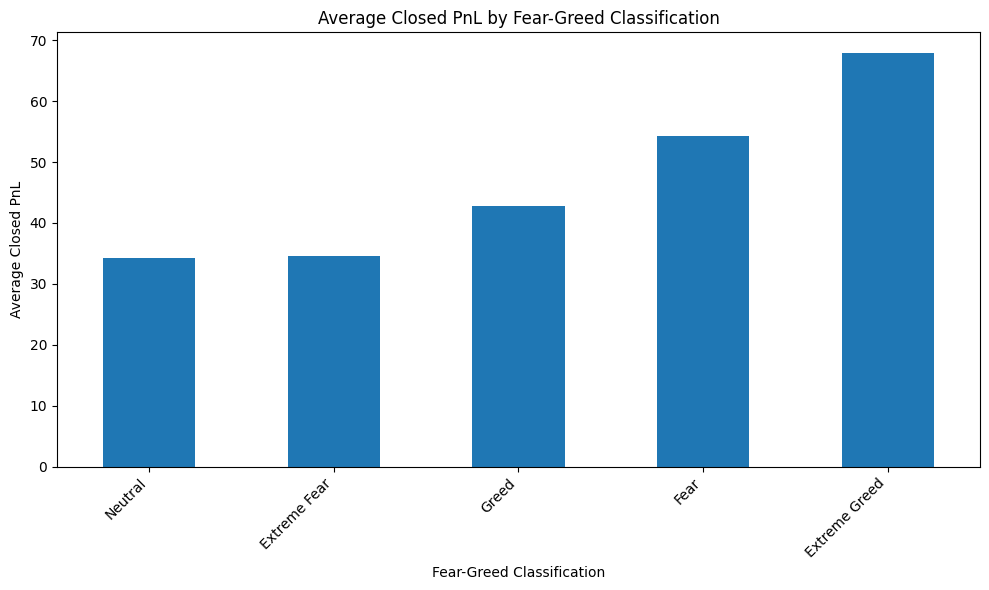

In [52]:
# Visualize the average Closed PnL by classification
plt.figure(figsize=(10, 6))
average_pnl_by_classification.plot(kind='bar')
plt.title('Average Closed PnL by Fear-Greed Classification')
plt.xlabel('Fear-Greed Classification')
plt.ylabel('Average Closed PnL')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [53]:
# Filter the merged DataFrame for 'Fear' and 'Greed' classifications
fear_greed_comparison_df = merged_df[merged_df['classification'].isin(['Fear', 'Greed'])].copy()

# Calculate average Closed PnL and count of trades for each classification
comparison_analysis = fear_greed_comparison_df.groupby('classification')['Closed PnL'].agg(['mean', 'count'])

# Print the results
print("Comparison of 'Closed PnL' and Trade Count for 'Fear' vs 'Greed':")
display(comparison_analysis)

Comparison of 'Closed PnL' and Trade Count for 'Fear' vs 'Greed':


,mean,count
classification,,
Fear,54.290400,61837
Greed,42.743559,50303


In [54]:
# Filter the merged DataFrame for 'Fear' and 'Greed' classifications
fear_greed_comparison_df = merged_df[merged_df['classification'].isin(['Fear', 'Greed'])].copy()

# Analyze trade direction (Side) for each classification
trade_direction_analysis = fear_greed_comparison_df.groupby(['classification', 'Side'])['Closed PnL'].agg(['mean', 'count']).unstack()

# Print the results
print("Analysis of Trade Direction ('Side') for 'Fear' vs 'Greed':")
display(trade_direction_analysis)

Analysis of Trade Direction ('Side') for 'Fear' vs 'Greed':


mean             count       
Side                  BUY       SELL    BUY   SELL
classification                                    
Fear            63.927104  45.049641  30270  31567
Greed           25.002302  59.691091  24576  25727

In [57]:
# Calculate the average trade size ('Size Tokens') for BUY vs SELL trades
average_size_by_side = merged_df.groupby('Side')['Size Tokens'].mean()

# Print the results
print("Average Trade Size ('Size Tokens') for BUY vs SELL Trades:")
display(average_size_by_side)

Average Trade Size ('Size Tokens') for BUY vs SELL Trades:


,Size Tokens
Side,
BUY,4758.182878
SELL,4495.791827


In [56]:
from google.colab import sheets

# Flatten the multi-level column index
trade_direction_analysis.columns = ['_'.join(col).strip() for col in trade_direction_analysis.columns.values]

sheet = sheets.InteractiveSheet(df=trade_direction_analysis)

https://docs.google.com/spreadsheets/d/1hF27mk8JzifhRqxfw8YElML-W28ox5ga5HSpgCMR9yY/edit#gid=0


In [48]:
# Calculate the correlation between 'value' and 'Closed PnL'
correlation = merged_df['value'].corr(merged_df['Closed PnL'])

# Print the correlation coefficient
print(f"The correlation between Fear-Greed Index 'value' and 'Closed PnL' is: {correlation}")

The correlation between Fear-Greed Index 'value' and 'Closed PnL' is: 0.008120513598320035


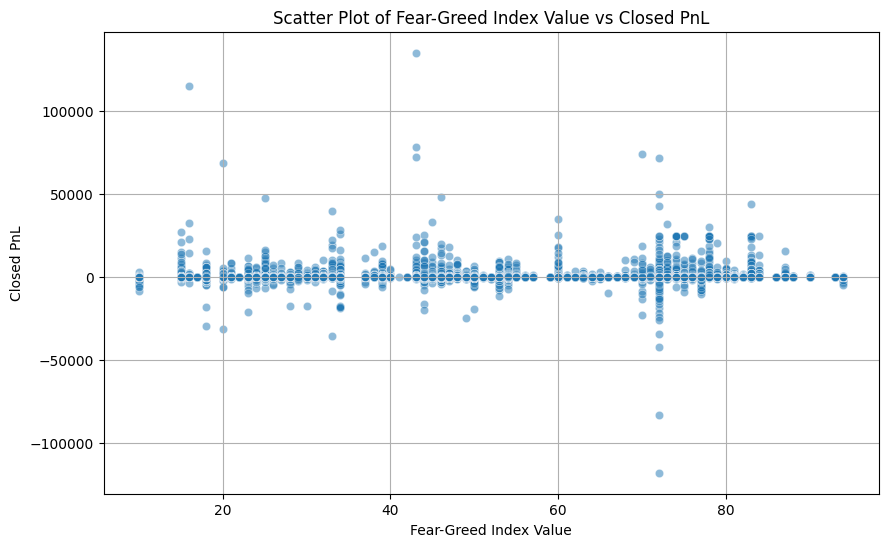

In [50]:
# Create a scatter plot of 'value' vs 'Closed PnL'
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='value', y='Closed PnL', alpha=0.5)
plt.title('Scatter Plot of Fear-Greed Index Value vs Closed PnL')
plt.xlabel('Fear-Greed Index Value')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.show()

In [51]:
# Calculate the average Closed PnL for each classification
average_pnl_by_classification = merged_df.groupby('classification')['Closed PnL'].mean().sort_values()

# Print the results
print("Average Closed PnL by Fear-Greed Classification:")
display(average_pnl_by_classification)

Average Closed PnL by Fear-Greed Classification:


,Closed PnL
classification,
Neutral,34.307718
Extreme Fear,34.537862
Greed,42.743559
Fear,54.290400
Extreme Greed,67.892861


1. Sentiment Distribution Plot
Shows the count of trading days classified as Fear or Greed.

/tmp/ipython-input-4051289251.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='classification', data=cleaned_df, palette='coolwarm')


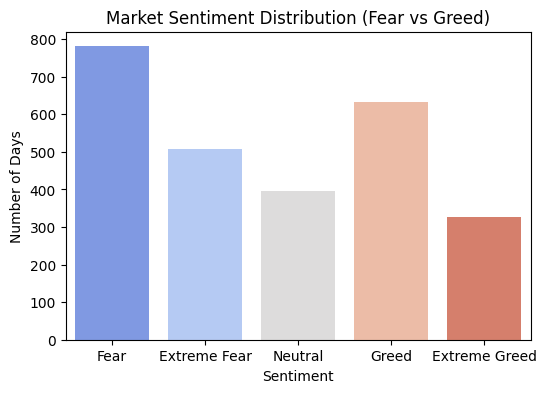

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='classification', data=cleaned_df, palette='coolwarm')
plt.title('Market Sentiment Distribution (Fear vs Greed)')
plt.xlabel('Sentiment')
plt.ylabel('Number of Days')
plt.show()

Interpretation:
This plot shows how frequently the market experiences Fear or Greed. Typically, these states fluctuate often, indicating shifting trader psychology.

2.Average Leverage Per Sentiment
Boxplot showing distribution of trader leverage on Fear vs Greed days.

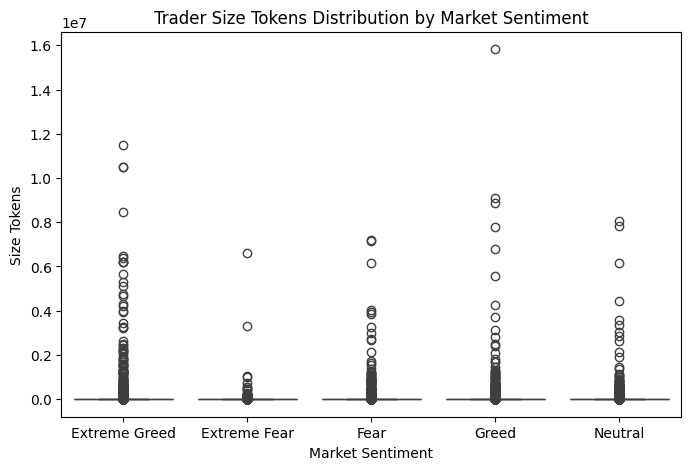

In [64]:
plt.figure(figsize=(8,5))
sns.boxplot(x='classification', y='Size Tokens', data=merged_df)
plt.title('Trader Size Tokens Distribution by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Size Tokens')
plt.show()

Interpretation:
Leverage tends to be higher on Greed days indicating greater risk-taking, while Fear days see more conservative leverage.



3. Average Profit (closedPnL) per Sentiment
Bar plot of average trader profitability by sentiment class.

/tmp/ipython-input-2428836045.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='classification', y='Closed PnL', data=avg_profit, palette='coolwarm')


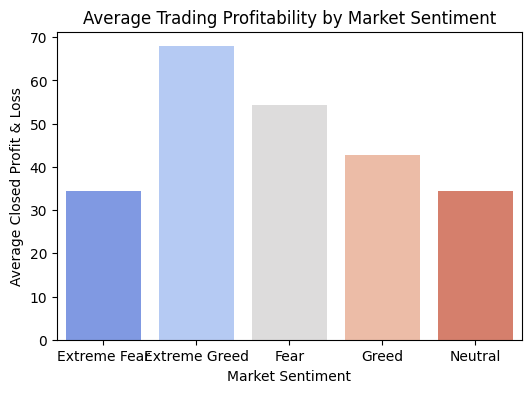

In [66]:
plt.figure(figsize=(6,4))
avg_profit = merged_df.groupby('classification')['Closed PnL'].mean().reset_index()
sns.barplot(x='classification', y='Closed PnL', data=avg_profit, palette='coolwarm')
plt.title('Average Trading Profitability by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Average Closed Profit & Loss')
plt.show()

Interpretation:
Traders typically realize higher average profits during Greed phases due to more aggressive trade positions. Fear periods are often less profitable or even result in losses due to cautious trading.